In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement


# Every 100 data samples, we save 1. If things run too
# slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 100


# Look pretty...
matplotlib.style.use('ggplot')

In [2]:
# Load up the scanned armadillo
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
        'x':plyfile['vertex']['z'][::reduce_factor],
        'y':plyfile['vertex']['x'][::reduce_factor],
        'z':plyfile['vertex']['y'][::reduce_factor]
})

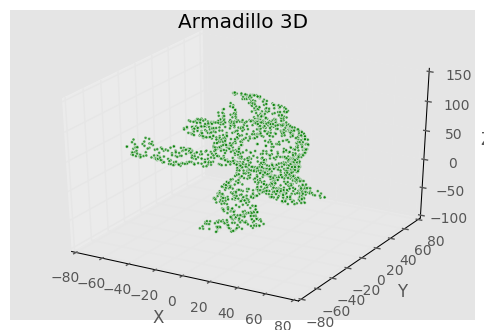

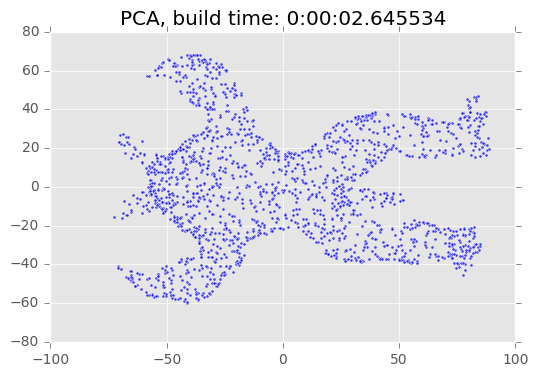

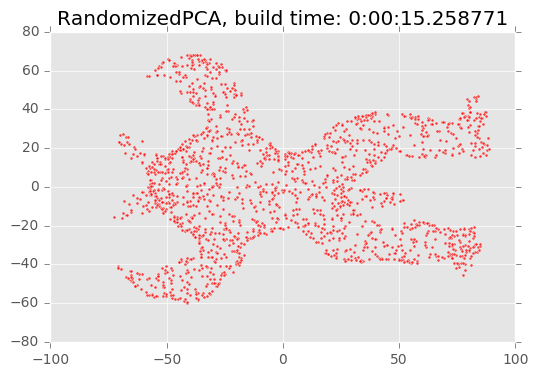

In [8]:
def do_PCA(armadillo):
    #
    # TODO: Write code to import the libraries required for PCA.
    # Then, train your PCA on the armadillo dataframe. Finally,
    # drop one dimension (reduce it down to 2D) and project the
    # armadillo down to the 2D principal component feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    #
    # .. your code here ..
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    pca.fit(armadillo)
    
    return pca.transform(armadillo)


def do_RandomizedPCA(armadillo):
    #
    # TODO: Write code to import the libraries required for
    # RandomizedPCA. Then, train your RandomizedPCA on the armadillo
    # dataframe. Finally, drop one dimension (reduce it down to 2D)
    # and project the armadillo down to the 2D principal component
    # feature space.
    #
    # NOTE: Be sure to RETURN your projected armadillo! 
    # (This projection is actually stored in a NumPy NDArray and
    # not a Pandas dataframe, which is something Pandas does for
    # you automatically. =)
    #
    # .. your code here ..
    from sklearn.decomposition import RandomizedPCA
    
    rd_pca = RandomizedPCA(n_components=2)
    rd_pca.fit(armadillo)
    
    return rd_pca.transform(armadillo)

# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

# Time the execution of PCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed PCA armadillo!
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)



# Time the execution of rPCA 5000x
t1 = datetime.datetime.now()
for i in range(5000): rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1

# Render the newly transformed RandomizedPCA armadillo!
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)


plt.show()